# Classes and Objects
Our week 3 lesson workbook, available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [16]:
import math
import random
from collections import defaultdict

import matplotlib.pyplot as plt
from pprint import pprint

### Everything in `python` is an `object`!
  * and every `object` has a `type`!
    * use `type(object)` to learn the type of an object
    * a `class` is used to define a `type`!
  * even a `function` is an `object` !!
  * an `object` has attributes, you can just add new attributes to any object (but don't!)

A little code to demonstrate...

In [17]:
# demo code
type(42)
type("hello world")
type(True)
from types import SimpleNamespace
student = SimpleNamespace(name="Joseph", sn= 123456789)
type(student)
type(int)
type(SimpleNamespace)
type(type)

type

In [18]:
s= "hello world"
#its called syntactic sugar
s.split()
len(s)
str.split
str.split(s)
type(s).split(s)
i = 42
i.__add__(10)
i + 10

52

## Problem: Collision detection using circles
A `class` is just a collection of `functions` that all work on the same piece of `data structure`.

The `data structure` is defined by the class's `instance variables`.

Easiest to understand if we do an example - let's define a `Circle` object type...

In [40]:
class Circle:
    """ Representation for the data and operations on a circle """
    def __init__(self, x: int, y: int, radius:float):
      self.x = x
      self.y = y
      self.radius = radius

    def str(self):
        """ Return a string representation of the Circle """
        return f"Circle radius {self.radius} at ({self.cx},{self.y})"

    def area(self) -> float:
        """ Return the area of this circle """
        return math.pi *self.radius**2

    def move(self, offset:tuple[int, int]):
        """ Move this circle by given (x,y) offset """
        self.x += offset[0]
        self.y += offset[1]

    def distance(self, other:"Circle"):
        """ Return the distance between this circle and the other one """
        dx = self.x - other.x
        dy = self.y - other.y
        return math.sqrt(dx**2 + dy**2)

    def intersects(self, other:"Circle") -> bool:
        """ Return True iff this circle intersects the other one """
        return self.distance(other) <= self.radius + other.radius

In [41]:
# Test Circle class
c= Circle(x=5, y=9, radius= 42)
#c.__str__()
str(c)
c.area()
assert c.area() == 5541.769440932395
c.move((1,-1))
assert c.x ==6 and c.y ==8
str(c)
c2 = Circle (x=7,y=7, radius =9)
c.distance(c2)
assert c.distance(c2) == math.sqrt(2)
assert c.intersects(c2) is True
#Code a little test a little
c3 = Circle(x=20 , y= 20, radius=9)
assert c2.intersects(c3) is False

## Problem:  Counting
When conducting an experiment, it is common to count occurances.  For example

* in a physics experiment, we might count the number of atomic collisions in which certain sub-atomic particles were produced
* in biology, we might count the number of cells infected by a virus after a fixed time period
* in a computational experiment, we might count the frequency with which clusters of a give size form

To visualize such experimental results, we would generally plot a histogram, like this:


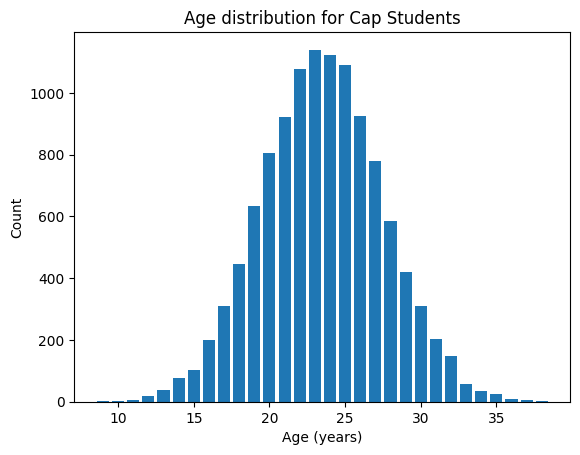

In [21]:
# Experiment: Get the age distribution for Cap students
n_cap_students = 11500

# Simulate getting the age for one Cap student
def get_age(student_id):
    return int(random.normalvariate(mu=24, sigma=4))  # Normally distributed age with mean of 24 years

# Run experiment to obtain the age for each student
data = [get_age(id) for id in range(n_cap_students)]

# count the number of students in each age class
histogram = {}
for age in data:
    histogram[age] = histogram.get(age, 0) + 1

# configure a plot to draw the bar chart in
_, ax = plt.subplots()
ax.set(
    title="Age distribution for Cap Students",
    xlabel='Age (years)',
    ylabel='Count',
)

# plot a histogram of the data, divided into n "equal width" bins
ax.bar(histogram.keys(), histogram.values())
plt.show()

## Custom Histogram Class

Define our own historgram class that serves as a "wrapper" for clunky pyplot ax.hist

In [22]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel='Categories', ylabel='Count'):
        _, ax = plt.subplots()
        ax.set(
            title=title,
            xlabel=xlabel,
            ylabel=ylabel,
        )
        self.ax = ax
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

### The Power of Abstraction

The real benefits appear when we go to use this class to solve the original problem.

Notice how creating an "abstraction" for a histogram makes it much easier to understand what the computation is doing.  Also notice, the class is "reusable" - we can now deploy this abstraction any time we need a histogram!

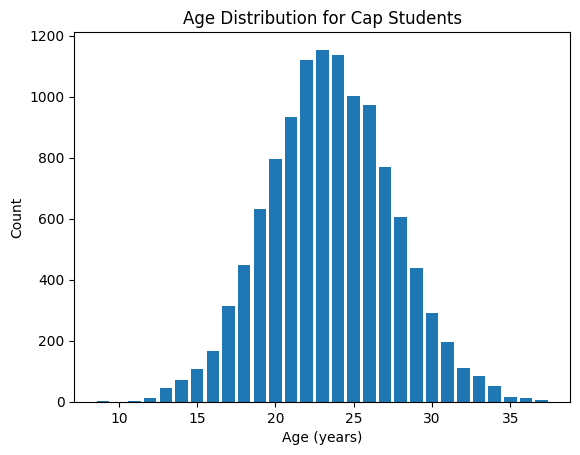

In [23]:
hist = Histogram(title='Age Distribution for Cap Students', xlabel='Age (years)')
for id in range(n_cap_students):
    hist.count(get_age(id))
hist.plot()